# Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow import keras

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

170498071/170498071 [==============================] - 19s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [5]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [6]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs:', nClasses)
print('Output classes:', classes)

Total number of outputs: 10
Output classes: [0 1 2 3 4 5 6 7 8 9]


In [7]:
label_dict = {
    
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


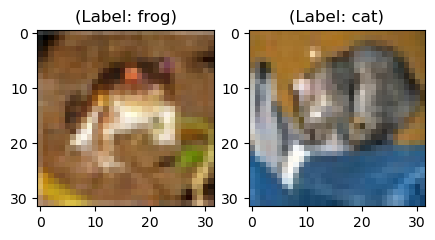

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

In [9]:
np.min(x_train),np.max(x_train)

(0, 255)

In [10]:
x_train = x_train/255.0

In [11]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))

Size of the dataframe: (50000, 3073)


In [14]:
df_cifar.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [15]:
df_cifar.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
49995,0.568627,0.631373,0.760784,0.592157,0.650980,0.780392,0.611765,0.670588,0.803922,0.607843,...,0.152941,0.160784,0.219608,0.141176,0.149020,0.207843,0.145098,0.152941,0.211765,2
49996,1.000000,0.960784,0.517647,0.996078,0.968627,0.525490,1.000000,0.976471,0.537255,0.996078,...,0.976471,0.682353,0.309804,0.988235,0.709804,0.317647,0.992157,0.709804,0.298039,6
49997,0.137255,0.698039,0.921569,0.156863,0.690196,0.937255,0.164706,0.690196,0.945098,0.152941,...,0.105882,0.203922,0.301961,0.082353,0.168627,0.258824,0.047059,0.121569,0.196078,9
49998,0.741176,0.827451,0.941176,0.729412,0.815686,0.925490,0.725490,0.811765,0.921569,0.721569,...,0.764706,0.721569,0.662745,0.768627,0.741176,0.670588,0.764706,0.745098,0.670588,1
49999,0.898039,0.898039,0.937255,0.925490,0.929412,0.968627,0.917647,0.925490,0.968627,0.905882,...,0.701961,0.694118,0.678431,0.643137,0.643137,0.635294,0.639216,0.639216,0.631373,1


In [16]:
from sklearn.decomposition import PCA
pca_cifar = PCA(n_components = 2)
principalcomponent_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [17]:
principal_cifar_Df = pd.DataFrame(data = principalcomponent_cifar,
    columns= ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [18]:
principal_cifar_Df.head()

,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [19]:
pca_cifar.explained_variance_ratio_

array([0.2907663 , 0.11253144])

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

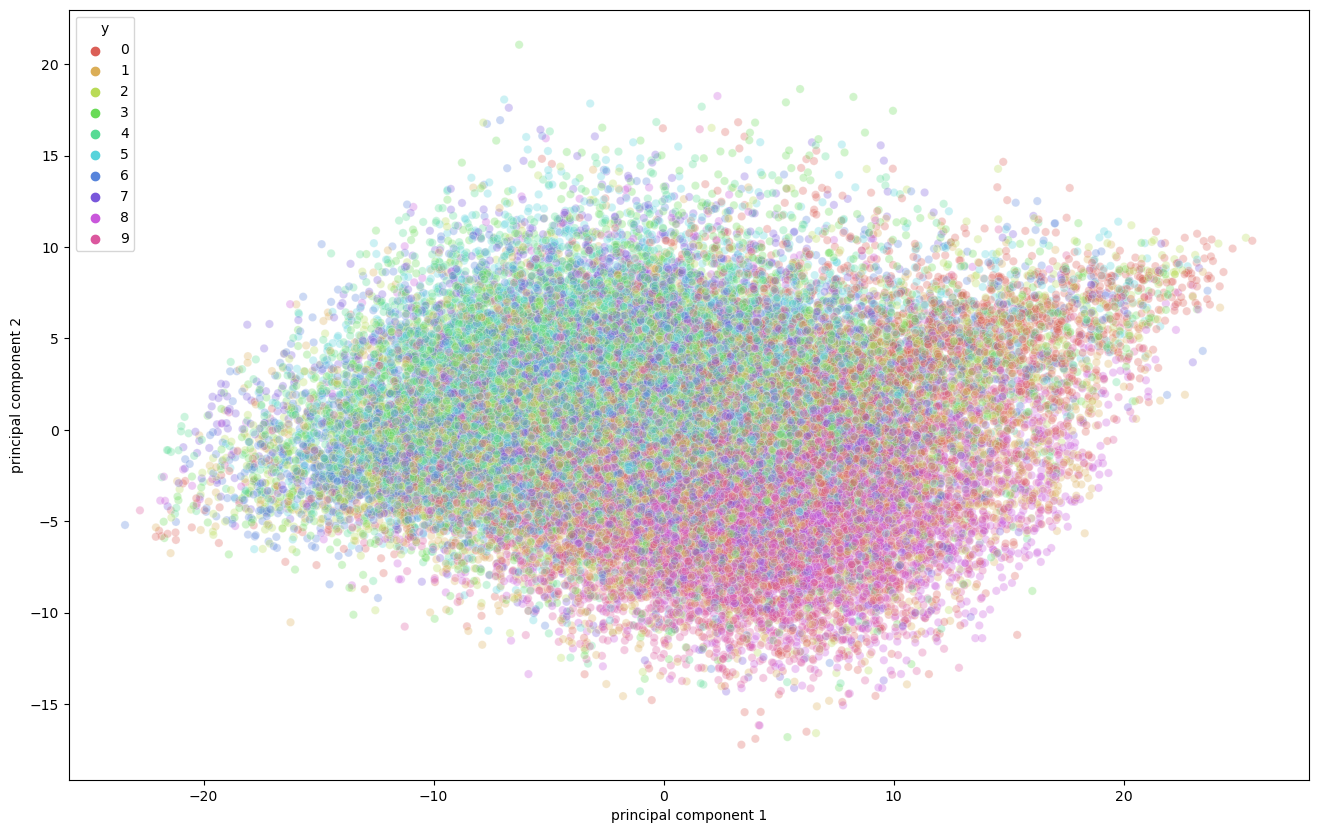

In [20]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette = sns.color_palette("hls",10),
    data=principal_cifar_Df,
    legend="full",
    alpha = 0.3
)